# Analyse des données

### Import des librairies 

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

### Import du dataset 

In [2]:
file_path ='/Users/saimanenawal/Downloads/offres_emploi_concatene_cleaned.csv'

In [3]:
df=pd.read_csv(file_path)
print(df.head())


                                            intitule        source  \
0  Administrateur systèmes et réseaux informatiqu...  Informatique   
1                        Technicien informatique F/H  Informatique   
2  Ingénieur de production/exploitation informati...  Informatique   
3                      Technicien informatique (H/F)  Informatique   
4           Chef de projet réseau informatique (H/F)  Informatique   

   departement  salaire_annuel  etude_requise  experience_requise  contrat  \
0         41.0         38000.0            5.0                24.0        2   
1         69.0         24238.0            NaN                12.0        2   
2         41.0         35000.0            5.0                60.0        2   
3          NaN         27000.0            5.0                 0.0        0   
4         74.0         45000.0            NaN               132.0        0   

  romeCode_extract  tps_Pp  secteur_activite  qualificationCode  
0              M18     1.0              78.0

## Distribution des salaires 

#### Boxplot

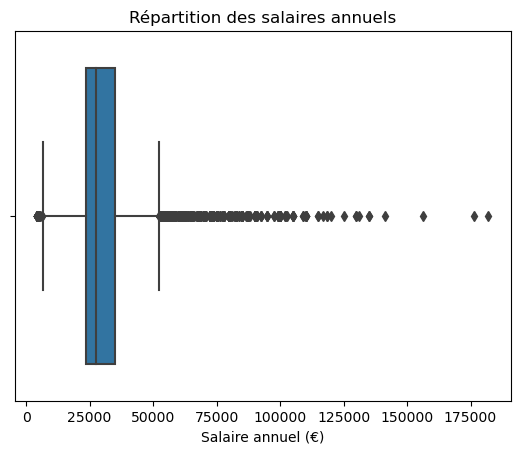

In [4]:
sns.boxplot(data=df, x='salaire_annuel')
plt.title('Répartition des salaires annuels')
plt.xlabel('Salaire annuel (€)')
plt.show()

Ici la distribution est très générale vu qu'on ne sépare pas par catégorie, donc ceci ne nous raporte que peu d'information: dans nos données la moyenne des salaire annuels est environ vers les 25000€ par an 

## Répartition des salaires par catégorie (transport, media, etc )

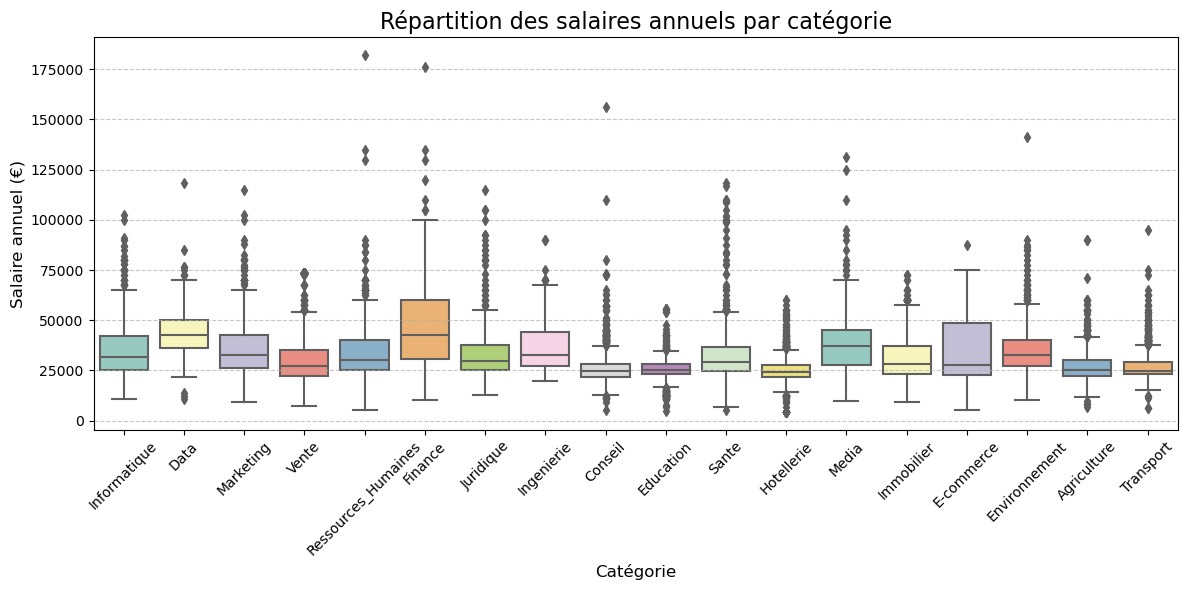

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(data= df, x='source', y='salaire_annuel', palette='Set3' )
plt.title("Répartition des salaires annuels par catégorie", fontsize=16)
plt.xlabel('Catégorie', fontsize=12)
plt.ylabel('Salaire annuel (€)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--', alpha =0.7)
plt.tight_layout()
plt.show()

On remarque que la catégorie qui paye le mieux est la finance (résultat prédictible), alors que les domaines tels que la vente, l'éducation, le conseil ou le transport payent moins

## Répartition des salaires par région

In [6]:
departements_noms = {
    1: "Ain", 2: "Aisne", 3: "Allier", 4: "Alpes-de-Haute-Provence",
    5: "Hautes-Alpes", 6: "Alpes-Maritimes", 7: "Ardèche", 8: "Ardennes",
    9: "Ariège", 10: "Aube", 11: "Aude", 12: "Aveyron", 13: "Bouches-du-Rhône",
    14: "Calvados", 15: "Cantal", 16: "Charente", 17: "Charente-Maritime",
    18: "Cher", 19: "Corrèze", 20: "Corse", 21: "Côte-d'Or",
    22: "Côtes-d'Armor", 23: "Creuse", 24: "Dordogne", 25: "Doubs",
    26: "Drôme", 27: "Eure", 28: "Eure-et-Loir", 29: "Finistère",
    30: "Gard", 31: "Haute-Garonne", 32: "Gers", 33: "Gironde", 34: "Hérault",
    35: "Ille-et-Vilaine", 36: "Indre", 37: "Indre-et-Loire", 38: "Isère",
    39: "Jura", 40: "Landes", 41: "Loir-et-Cher", 42: "Loire", 43: "Haute-Loire",
    44: "Loire-Atlantique", 45: "Loiret", 46: "Lot", 47: "Lot-et-Garonne",
    48: "Lozère", 49: "Maine-et-Loire", 50: "Manche", 51: "Marne",
    52: "Haute-Marne", 53: "Mayenne", 54: "Meurthe-et-Moselle", 55: "Meuse",
    56: "Morbihan", 57: "Moselle", 58: "Nièvre", 59: "Nord", 60: "Oise",
    61: "Orne", 62: "Pas-de-Calais", 63: "Puy-de-Dôme", 64: "Pyrénées-Atlantiques",
    65: "Hautes-Pyrénées", 66: "Pyrénées-Orientales", 67: "Bas-Rhin",
    68: "Haut-Rhin", 69: "Rhône", 70: "Haute-Saône", 71: "Saône-et-Loire",
    72: "Sarthe", 73: "Savoie", 74: "Haute-Savoie", 75: "Paris",
    76: "Seine-Maritime", 77: "Seine-et-Marne", 78: "Yvelines", 79: "Deux-Sèvres",
    80: "Somme", 81: "Tarn", 82: "Tarn-et-Garonne", 83: "Var", 84: "Vaucluse",
    85: "Vendée", 86: "Vienne", 87: "Haute-Vienne", 88: "Vosges", 89: "Yonne",
    90: "Territoire de Belfort", 91: "Essonne", 92: "Hauts-de-Seine", 
    93: "Seine-Saint-Denis", 94: "Val-de-Marne", 95: "Val-d'Oise",
    971: "Guadeloupe", 972: "Martinique", 973: "Guyane",
    974: "La Réunion", 976: "Mayotte"
}


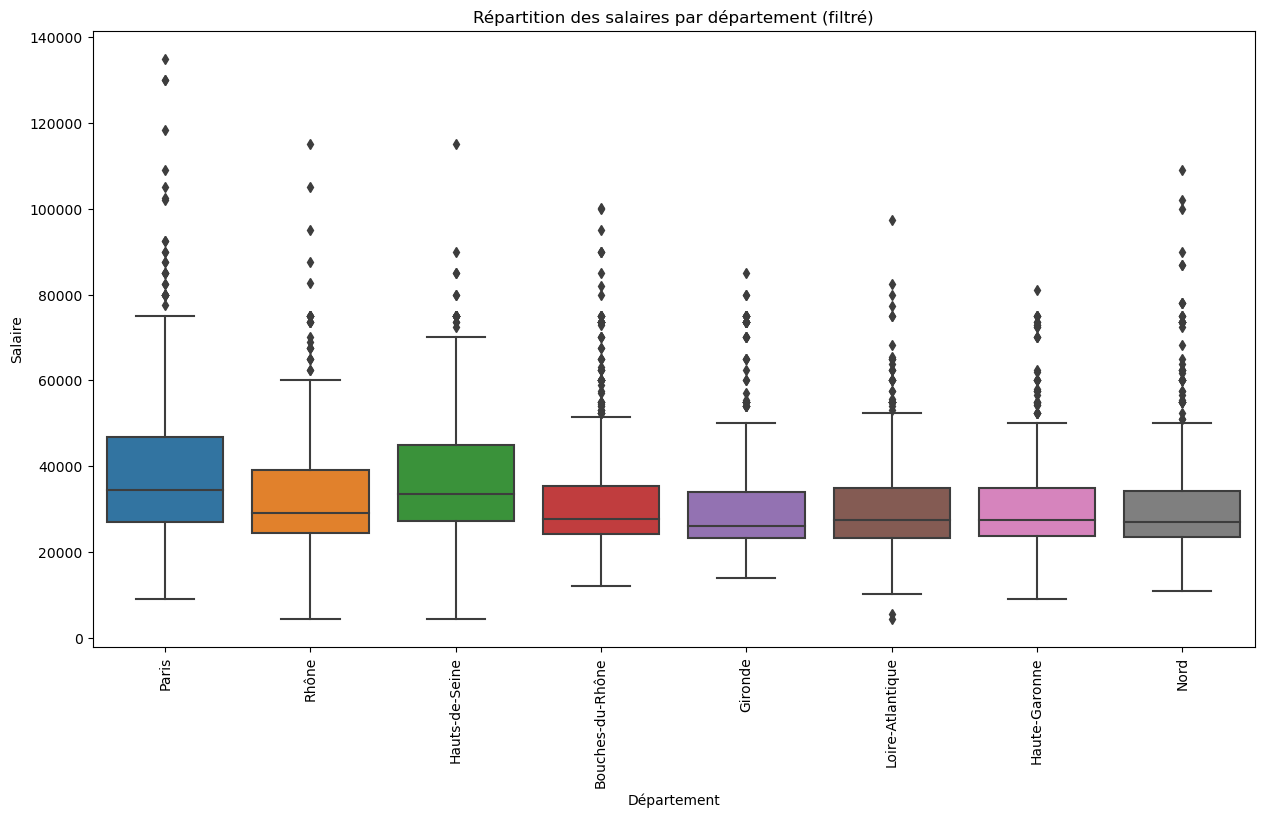

In [11]:
# Définir le seuil minimum d'offres par région
seuil_offres = 1000

# Ajouter une colonne 'Nom Département' en utilisant le dictionnaire
df['Nom Département'] = df['departement'].map(departements_noms)

# Filtrer les départements avec un nombre d'offres supérieur ou égal au seuil
offres_par_departement = df['Nom Département'].value_counts()
departements_a_garder = offres_par_departement[offres_par_departement >= seuil_offres].index
df_filtre = df[df['Nom Département'].isin(departements_a_garder)]

# Créer le boxplot pour les départements avec suffisamment d'offres
plt.figure(figsize=(15, 8))
sns.boxplot(
    x='Nom Département', 
    y='salaire_annuel', 
    data=df_filtre, 
    order=departements_a_garder
)
plt.title("Répartition des salaires par département (filtré)")
plt.xticks(rotation=90)
plt.xlabel("Département")
plt.ylabel("Salaire")
plt.show()

On remarque que les plus haut salaires sont sur Paris

## Répartition des salaires par années d'études requises

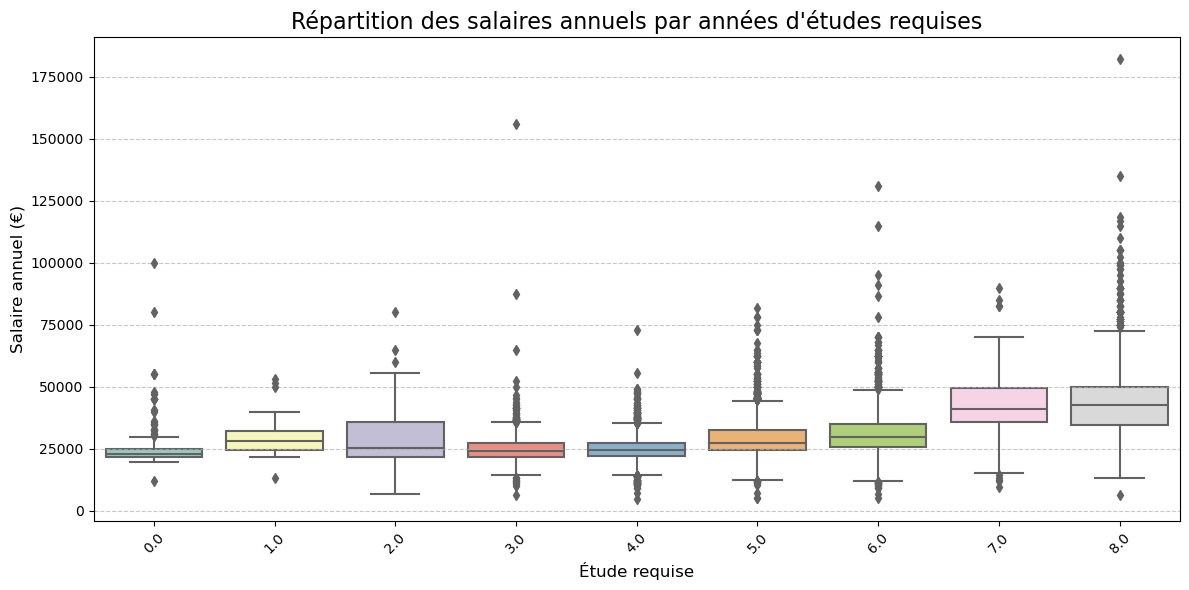

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data= df, x='etude_requise', y='salaire_annuel', palette='Set3' )
plt.title("Répartition des salaires annuels par années d'études requises", fontsize=16)
plt.xlabel('Étude requise', fontsize=12)
plt.ylabel('Salaire annuel (€)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--', alpha =0.7)
plt.tight_layout()
plt.show()